<a href="https://colab.research.google.com/github/smrahman1/computer-vision-bootcamp/blob/master/WARG_CV_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# CONSTANTS
BATCH_SIZE = 32
EPOCHS = 10

# Distributing data into variables
dataSet = tf.keras.datasets.cifar10
(xTrain, yTrain), (xTest, yTest) = dataSet.load_data()

# Normalizing data so that the data is organized and on a common scale. 
# This helps the model converge quicker.
xTrain = tf.keras.utils.normalize(xTrain, axis = 1)
xTest = tf.keras.utils.normalize(xTest, axis = 1)


# Input layer, Convolutional Layer with 128 Filters and Pooling Layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128, (3,3), input_shape = xTrain.shape[1:]))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))

# Second layer, Convolutional Layer with 64 Filters and Pooling Layer
model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))

# Third layer, Dense Layer with 128 Filters
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation("relu"))

# Output layer, Dense Layer with softmax activation
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation("softmax"))

# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Fit the model and store it in a variable
historyTrain = model.fit(xTrain, yTrain, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/10
1563/1563 [==============================] - 211s 135ms/step - loss: 1.6917 - accuracy: 0.3936
Epoch 2/10
1563/1563 [==============================] - 210s 134ms/step - loss: 1.3530 - accuracy: 0.5217
Epoch 3/10
1563/1563 [==============================] - 211s 135ms/step - loss: 1.2121 - accuracy: 0.5738
Epoch 4/10
1563/1563 [==============================] - 213s 136ms/step - loss: 1.1225 - accuracy: 0.6079
Epoch 5/10
1563/1563 [==============================] - 212s 136ms/step - loss: 1.0446 - accuracy: 0.6358
Epoch 6/10
1563/1563 [==============================] - 211s 135ms/step - loss: 0.9830 - accuracy: 0.6563
Epoch 7/10
1563/1563 [==============================] - 212s 135ms/step - loss: 0.9303 - accuracy: 0.6766
Epoch 8/10
1563/1563 [==============================] - 211s 135ms/step - loss: 0.8828 - accuracy: 0.6927
Epoch 9/10
1563/1563 [==============================] - 209s 134ms/step - loss: 0.8431 - accuracy: 0.7056
Epoch 10/10
1563/1563 [=======================

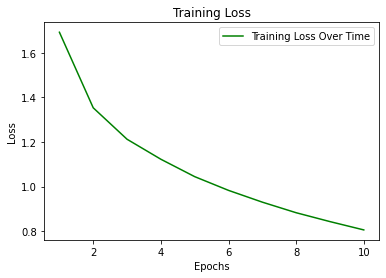

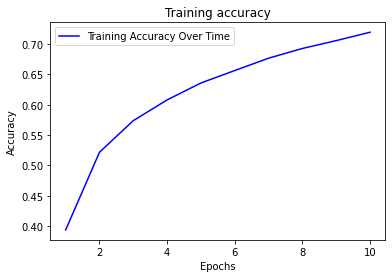

313/313 [==============================] - 10s 30ms/step - loss: 0.9496 - accuracy: 0.6753
Validation loss:  0.9495689272880554 
Validation Accuracy:  67.53000020980835 %


In [36]:
# Plots and Testing Model Accuracy

lossTrain = historyTrain.history['loss']
accTrain = historyTrain.history['accuracy']
epochs = range(1, EPOCHS+1)


plt.plot(epochs, lossTrain, 'g', label='Training Loss Over Time')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, accTrain, 'b', label='Training Accuracy Over Time')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

valLoss, valAcc = model.evaluate(xTest, yTest)
print("Validation loss: ", valLoss, "\nValidation Accuracy: ", valAcc*100, "%")